Download the dataset from (from the ASA Data Expo 2009) http://stat-computing.org/dataexpo/2009/the-data.html save the file into data folder    

In [2]:
# ipak function: install and load multiple R packages.
# check to see if packages are installed. Install them if they are not, then load them into the R session.

ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, 
                         dependencies = TRUE, 
                         repos = "http://cran.us.r-project.org", 
                         lib = "C://Users//Suman//Documents//R//win-library//3.3")
    sapply(pkg, require, character.only = TRUE)
}

# usage
packages <- c("data.table")
ipak(packages)

Loading required package: data.table


data.table 
      TRUE

In [3]:
myDF <- fread("D:/GitHub/FLflightDataAnalysis/data/2008.csv")  # fread used from data.table package for fast reading

Read 7009728 rows and 29 (of 29) columns from 0.642 GB file in 00:00:33


In [5]:
#dim(myDF) #Since it takes long time to read all rows and columns we just read one time the rows and columns and made a comment 

In [6]:
names(myDF)

[1] "Year"              "Month"             "DayofMonth"       
 [4] "DayOfWeek"         "DepTime"           "CRSDepTime"       
 [7] "ArrTime"           "CRSArrTime"        "UniqueCarrier"    
[10] "FlightNum"         "TailNum"           "ActualElapsedTime"
[13] "CRSElapsedTime"    "AirTime"           "ArrDelay"         
[16] "DepDelay"          "Origin"            "Dest"             
[19] "Distance"          "TaxiIn"            "TaxiOut"          
[22] "Cancelled"         "CancellationCode"  "Diverted"         
[25] "CarrierDelay"      "WeatherDelay"      "NASDelay"         
[28] "SecurityDelay"     "LateAircraftDelay"

In [7]:
print(head(myDF))

   Year Month DayofMonth DayOfWeek DepTime CRSDepTime ArrTime CRSArrTime
1: 2008     1          3         4    2003       1955    2211       2225
2: 2008     1          3         4     754        735    1002       1000
3: 2008     1          3         4     628        620     804        750
4: 2008     1          3         4     926        930    1054       1100
5: 2008     1          3         4    1829       1755    1959       1925
6: 2008     1          3         4    1940       1915    2121       2110
   UniqueCarrier FlightNum TailNum ActualElapsedTime CRSElapsedTime AirTime
1:            WN       335  N712SW               128            150     116
2:            WN      3231  N772SW               128            145     113
3:            WN       448  N428WN                96             90      76
4:            WN      1746  N612SW                88             90      78
5:            WN      3920  N464WN                90             90      77
6:            WN       378  N726S

In [8]:
print(head(myDF$Origin))
print(tail(myDF$Origin))

[1] "IAD" "IAD" "IND" "IND" "IND" "IND"
[1] "SAV" "ATL" "ATL" "PBI" "IAD" "SAT"


In [9]:
print(head(myDF$Dest))
print(tail(myDF$Dest))

[1] "TPA" "TPA" "BWI" "BWI" "BWI" "JAX"
[1] "ATL" "IAD" "SAT" "ATL" "ATL" "ATL"


In [10]:
nrow(myDF)

[1] 7009728

In [11]:
head(myDF$Origin == "IND") # from first six fligtht which are coming from IND

[1] FALSE FALSE  TRUE  TRUE  TRUE  TRUE

In [12]:
sum(myDF$Origin == "IND")
# the number of flights departing from Indy in 2008

[1] 42750

In [13]:
# how many destination city "IND
sum(myDF$Dest == "IND")

[1] 42732

In [14]:
# In 2008, how many flights departed from O’Hare Airport (ORD)?
sum(myDF$Origin == "ORD")

[1] 350380

In [15]:
# In 2008, how many flights arrived at O’Hare Airport (ORD)?
sum(myDF$Dest == "ORD" )

[1] 350452

In [16]:
#How many flights in the data set departed from the Indianapolis Airport (IND) and arrived at the O’Hare Airport (ORD)?
sum((myDF$Origin == "IND") & (myDF$Dest == "ORD"))

[1] 4102

### Extracting Flight Data with a Common City of Origin

In [17]:
MyIndyOrigins <- subset(myDF, myDF$Origin == "IND")
nrow(MyIndyOrigins)

[1] 42750

In [18]:
IndianapolisDestinations <- subset(myDF, myDF$Dest == "IND")
print(nrow(IndianapolisDestinations))

[1] 42732


In [19]:
ls()

[1] "IndianapolisDestinations" "ipak"                    
[3] "myDF"                     "MyIndyOrigins"           
[5] "packages"

In [20]:
head(MyIndyOrigins[,10:ncol(MyIndyOrigins)])

FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,,0,NA,NA,NA,NA,NA
1746,N612SW,88,90,78,-6,-4,IND,BWI,515,3,7,0,,0,NA,NA,NA,NA,NA
3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,,0,2,0,0,0,32
378,N726SW,101,115,87,11,25,IND,JAX,688,4,10,0,,0,NA,NA,NA,NA,NA
509,N763SW,240,250,230,57,67,IND,LAS,1591,3,7,0,,0,10,0,0,0,47
535,N428WN,233,250,219,-18,-1,IND,LAS,1591,7,7,0,,0,NA,NA,NA,NA,NA


In [21]:
names(MyIndyOrigins)
sapply(MyIndyOrigins, class)

[1] "Year"              "Month"             "DayofMonth"       
 [4] "DayOfWeek"         "DepTime"           "CRSDepTime"       
 [7] "ArrTime"           "CRSArrTime"        "UniqueCarrier"    
[10] "FlightNum"         "TailNum"           "ActualElapsedTime"
[13] "CRSElapsedTime"    "AirTime"           "ArrDelay"         
[16] "DepDelay"          "Origin"            "Dest"             
[19] "Distance"          "TaxiIn"            "TaxiOut"          
[22] "Cancelled"         "CancellationCode"  "Diverted"         
[25] "CarrierDelay"      "WeatherDelay"      "NASDelay"         
[28] "SecurityDelay"     "LateAircraftDelay"

Year             Month        DayofMonth         DayOfWeek 
        "integer"         "integer"         "integer"         "integer" 
          DepTime        CRSDepTime           ArrTime        CRSArrTime 
        "integer"         "integer"         "integer"         "integer" 
    UniqueCarrier         FlightNum           TailNum ActualElapsedTime 
      "character"         "integer"       "character"         "integer" 
   CRSElapsedTime           AirTime          ArrDelay          DepDelay 
        "integer"         "integer"         "integer"         "integer" 
           Origin              Dest          Distance            TaxiIn 
      "character"       "character"         "integer"         "integer" 
          TaxiOut         Cancelled  CancellationCode          Diverted 
        "integer"         "integer"       "character"         "integer" 
     CarrierDelay      WeatherDelay          NASDelay     SecurityDelay 
        "integer"         "integer"         "integer"         "integer" 
LateAircraftDelay 
        "integer"

In [22]:
head(MyIndyOrigins$Month)

[1] 1 1 1 1 1 1

In [23]:
tail(MyIndyOrigins$Month)

[1] 12 12 12 12 12 12

In [24]:
table(MyIndyOrigins$Month)


   1    2    3    4    5    6    7    8    9   10   11   12 
3580 3414 3764 3644 3768 3852 3986 3700 3300 3418 3126 3198 

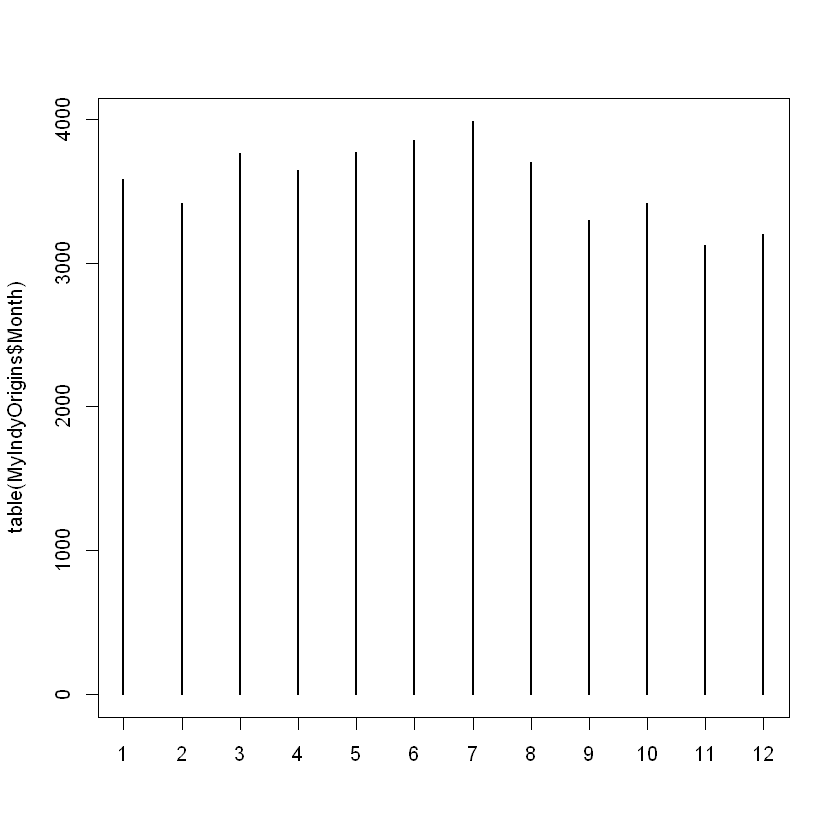

In [25]:
plot(table(MyIndyOrigins$Month))


   1    2    3    4    5    6    7    8    9   10   11   12 
3582 3413 3764 3642 3765 3857 3985 3696 3294 3418 3125 3191 

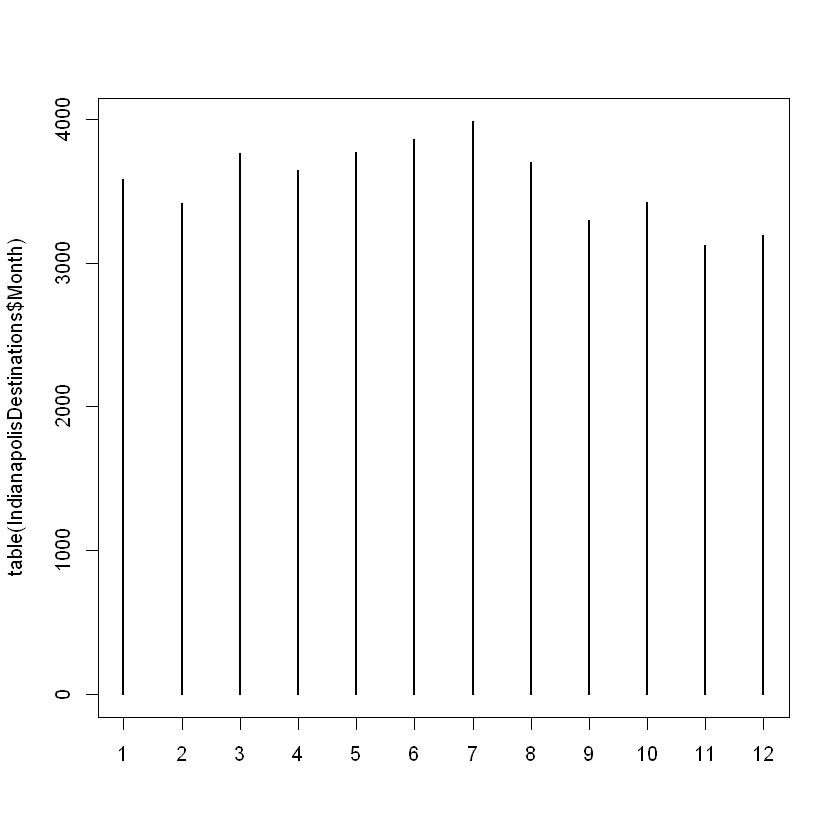

In [26]:
table(IndianapolisDestinations$Month)
plot(table(IndianapolisDestinations$Month))

In [27]:
# How many flights departed from TUP in 2008?
sum(myDF$Origin == "TUP")

[1] 10

In [28]:
# What is the average departure delay of the flights that depart from TUP in 2008?
mean(subset(myDF$DepDelay,myDF$Origin == "TUP"))       


[1] -3.8

In [29]:
head(MyIndyOrigins)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2008,1,3,4,628,620,804,750,WN,448,...,3,17,0,,0,NA,NA,NA,NA,NA
2008,1,3,4,926,930,1054,1100,WN,1746,...,3,7,0,,0,NA,NA,NA,NA,NA
2008,1,3,4,1829,1755,1959,1925,WN,3920,...,3,10,0,,0,2,0,0,0,32
2008,1,3,4,1940,1915,2121,2110,WN,378,...,4,10,0,,0,NA,NA,NA,NA,NA
2008,1,3,4,1937,1830,2037,1940,WN,509,...,3,7,0,,0,10,0,0,0,47
2008,1,3,4,1039,1040,1132,1150,WN,535,...,7,7,0,,0,NA,NA,NA,NA,NA


In [30]:
# DepTime
head(MyIndyOrigins$DepTime < 600)
head(MyIndyOrigins$DepTime < 1000)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

[1]  TRUE  TRUE FALSE FALSE FALSE FALSE

In [31]:
sum(MyIndyOrigins$DepTime < 600, na.rm =TRUE) # early morning departed before 6 AM


[1] 692

In [32]:
sum(MyIndyOrigins$DepTime < 1200, na.rm =TRUE)
sum(MyIndyOrigins$DepTime < 1400, na.rm =TRUE)
sum(MyIndyOrigins$DepTime < 2400, na.rm =TRUE) 

[1] 18705

[1] 23738

[1] 42011

In [33]:
sum(is.na(MyIndyOrigins$DepTime))

[1] 739

In [34]:
42011 + 739 # check whether total is equal to MyIndyOrigins or not  

[1] 42750

In [35]:
 #How many flights arrived at LAX in 2008?
sum(myDF$Dest == "LAX")

[1] 215685

In [36]:
# How many flights departed from ATL and landed at LAX in 2008?
sum(myDF$Origin == "ATL" & myDF$Dest == "LAX")

[1] 5406

In [37]:
#Among the flights from ATL to LAX in 2008, how many departed before 12 noon?
sum(myDF$Origin == "ATL" & myDF$Dest == "LAX" & myDF$DepTime < 1200, na.rm= TRUE)

[1] 2133

In [38]:
table(myDF$Origin)   


   ABE    ABI    ABQ    ABY    ACK    ACT    ACV    ACY    ADK    ADQ    AEX 
  4807   2660  41146   1095    457   1993   3714    116    102    706   2330 
   AGS    AKN    ALB    ALO    AMA    ANC    ASE    ATL    ATW    AUS    AVL 
  2403    116  13474    323   7496  19327   5307 414513   5873  49623   4399 
   AVP    AZO    BDL    BET    BFL    BGM    BGR    BHM    BIL    BIS    BJI 
  2386   3924  29449   1035   4502    728   2879  23679   4505   2293     74 
   BLI    BMI    BNA    BOI    BOS    BPT    BQK    BQN    BRO    BRW    BTM 
   120   4801  57539  17024 117915    276    925   1519   1464    728    708 
   BTR    BTV    BUF    BUR    BWI    BZN    CAE    CAK    CDC    CDV    CEC 
  8941   7005  26281  31405 104074   4659  10550   8994    668    725   1063 
   CHA    CHO    CHS    CIC    CID    CLD    CLE    CLL    CLT    CMH    CMI 
  4571    823  14181   1392   9377   2303  65795   1367 126045  34157   2774 
   CMX    COD    COS    CPR    CRP    CRW    CSG    CVG    CWA 

In [39]:
sort(table(myDF$Origin))


   PUB    PIR    TUP    INL    BJI    GST    ADK    ACY    AKN    DLG    BLI 
     2      5     10     72     74     85    102    116    116    116    120 
   SUX    ITH    HTS    LWB    TEX    RHI    PLN    WYS    BPT    RFD    CMX 
   122    132    158    185    194    221    264    264    276    290    318 
   ALO    YKM    MKG    STX    ACK    SLE    LMT    OTH    FLO    LYH    SCE 
   323    340    396    436    457    486    511    515    615    625    645 
   LWS    MCN    CDC    MEI    ADQ    BTM    CDV    YAK    PSG    SCC    WRG 
   652    652    668    674    706    708    725    725    727    727    727 
   BGM    BRW    PMD    PSE    EWN    CHO    HHH    BQK    VLD    RKS    IYK 
   728    728    728    755    791    823    836    925    938    954    958 
   GUC    ROW    GTR    GGG    IPL    MQT    LCH    EYW    BET    GCC    CEC 
   959    961    964    978    989    991   1000   1009   1035   1046   1063 
   MOT    OTZ    OME    ABY    OAJ    COD    SPI    TXK    OXR 

In [40]:
head(myDF$DepTime)

[1] 2003  754  628  926 1829 1940

In [41]:
seq(0, 2400, by = 100)

[1]    0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
[16] 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400

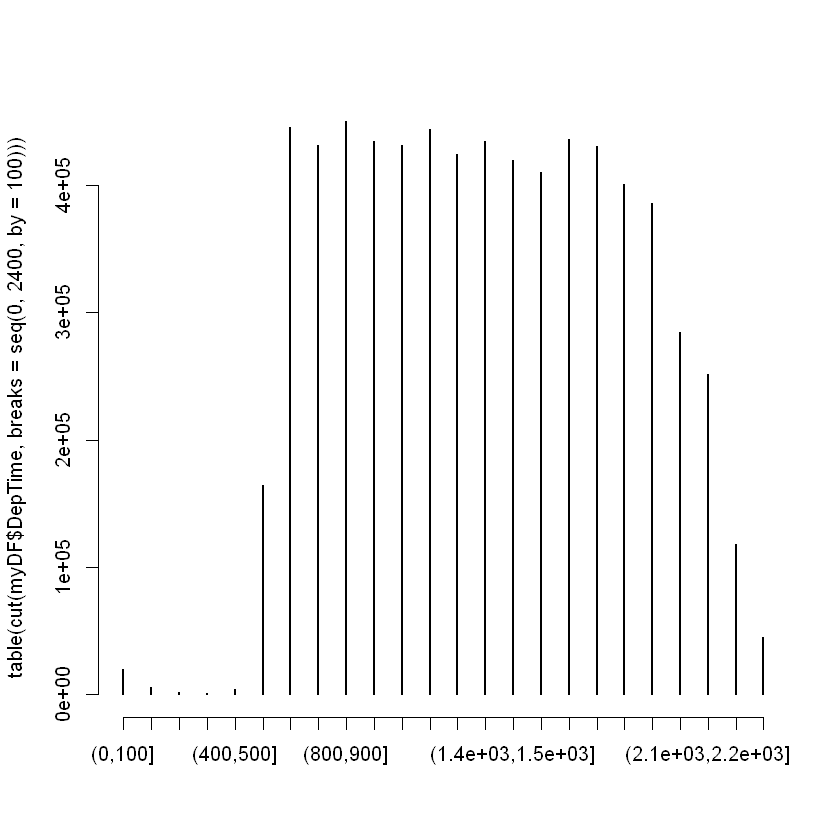

In [42]:
plot(table(cut(myDF$DepTime, breaks = seq(0, 2400, by = 100))))

In [43]:
table(myDF$Origin)


   ABE    ABI    ABQ    ABY    ACK    ACT    ACV    ACY    ADK    ADQ    AEX 
  4807   2660  41146   1095    457   1993   3714    116    102    706   2330 
   AGS    AKN    ALB    ALO    AMA    ANC    ASE    ATL    ATW    AUS    AVL 
  2403    116  13474    323   7496  19327   5307 414513   5873  49623   4399 
   AVP    AZO    BDL    BET    BFL    BGM    BGR    BHM    BIL    BIS    BJI 
  2386   3924  29449   1035   4502    728   2879  23679   4505   2293     74 
   BLI    BMI    BNA    BOI    BOS    BPT    BQK    BQN    BRO    BRW    BTM 
   120   4801  57539  17024 117915    276    925   1519   1464    728    708 
   BTR    BTV    BUF    BUR    BWI    BZN    CAE    CAK    CDC    CDV    CEC 
  8941   7005  26281  31405 104074   4659  10550   8994    668    725   1063 
   CHA    CHO    CHS    CIC    CID    CLD    CLE    CLL    CLT    CMH    CMI 
  4571    823  14181   1392   9377   2303  65795   1367 126045  34157   2774 
   CMX    COD    COS    CPR    CRP    CRW    CSG    CVG    CWA 

In [44]:
sort(table(myDF$Origin))


   PUB    PIR    TUP    INL    BJI    GST    ADK    ACY    AKN    DLG    BLI 
     2      5     10     72     74     85    102    116    116    116    120 
   SUX    ITH    HTS    LWB    TEX    RHI    PLN    WYS    BPT    RFD    CMX 
   122    132    158    185    194    221    264    264    276    290    318 
   ALO    YKM    MKG    STX    ACK    SLE    LMT    OTH    FLO    LYH    SCE 
   323    340    396    436    457    486    511    515    615    625    645 
   LWS    MCN    CDC    MEI    ADQ    BTM    CDV    YAK    PSG    SCC    WRG 
   652    652    668    674    706    708    725    725    727    727    727 
   BGM    BRW    PMD    PSE    EWN    CHO    HHH    BQK    VLD    RKS    IYK 
   728    728    728    755    791    823    836    925    938    954    958 
   GUC    ROW    GTR    GGG    IPL    MQT    LCH    EYW    BET    GCC    CEC 
   959    961    964    978    989    991   1000   1009   1035   1046   1063 
   MOT    OTZ    OME    ABY    OAJ    COD    SPI    TXK    OXR 

In [45]:
head(myDF$DepTime)

[1] 2003  754  628  926 1829 1940

In [46]:
seq(0, 2400, by =100)

[1]    0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
[16] 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400

In [47]:
#Identifying the Most Popular Flight Paths
table(myDF$Origin)


   ABE    ABI    ABQ    ABY    ACK    ACT    ACV    ACY    ADK    ADQ    AEX 
  4807   2660  41146   1095    457   1993   3714    116    102    706   2330 
   AGS    AKN    ALB    ALO    AMA    ANC    ASE    ATL    ATW    AUS    AVL 
  2403    116  13474    323   7496  19327   5307 414513   5873  49623   4399 
   AVP    AZO    BDL    BET    BFL    BGM    BGR    BHM    BIL    BIS    BJI 
  2386   3924  29449   1035   4502    728   2879  23679   4505   2293     74 
   BLI    BMI    BNA    BOI    BOS    BPT    BQK    BQN    BRO    BRW    BTM 
   120   4801  57539  17024 117915    276    925   1519   1464    728    708 
   BTR    BTV    BUF    BUR    BWI    BZN    CAE    CAK    CDC    CDV    CEC 
  8941   7005  26281  31405 104074   4659  10550   8994    668    725   1063 
   CHA    CHO    CHS    CIC    CID    CLD    CLE    CLL    CLT    CMH    CMI 
  4571    823  14181   1392   9377   2303  65795   1367 126045  34157   2774 
   CMX    COD    COS    CPR    CRP    CRW    CSG    CVG    CWA 

In [48]:
sort(table(myDF$Origin))


   PUB    PIR    TUP    INL    BJI    GST    ADK    ACY    AKN    DLG    BLI 
     2      5     10     72     74     85    102    116    116    116    120 
   SUX    ITH    HTS    LWB    TEX    RHI    PLN    WYS    BPT    RFD    CMX 
   122    132    158    185    194    221    264    264    276    290    318 
   ALO    YKM    MKG    STX    ACK    SLE    LMT    OTH    FLO    LYH    SCE 
   323    340    396    436    457    486    511    515    615    625    645 
   LWS    MCN    CDC    MEI    ADQ    BTM    CDV    YAK    PSG    SCC    WRG 
   652    652    668    674    706    708    725    725    727    727    727 
   BGM    BRW    PMD    PSE    EWN    CHO    HHH    BQK    VLD    RKS    IYK 
   728    728    728    755    791    823    836    925    938    954    958 
   GUC    ROW    GTR    GGG    IPL    MQT    LCH    EYW    BET    GCC    CEC 
   959    961    964    978    989    991   1000   1009   1035   1046   1063 
   MOT    OTZ    OME    ABY    OAJ    COD    SPI    TXK    OXR 

In [ ]:
#Identifying the Most Popular Flight Paths

head(myDF$Origin)
head(myDF$Dest)

In [59]:
tail(sort(table(paste(myDF$Origin, "to" , myDF$Dest))))


HNL to OGG BOS to LGA LGA to BOS OGG to HNL LAX to SFO SFO to LAX 
     12014      12029      12035      12383      13390      13788 

In [ ]:
# How many origin-to-destination paths were only flown one time (each) in 2008?
table(paste(myDF$Origin, "to", myDF$Dest)) == 1

In [66]:
sum(table(paste(myDF$Origin, "to", myDF$Dest)) == 1)

[1] 285